In [1]:
import pandas as pd
import geopandas
import numpy as np
from math import pi
from matplotlib import pyplot as plt
import seaborn as sns

## Configuraciones

In [2]:
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (18, 8)

sns.set(style="whitegrid", font_scale = 2) # seteando tipo de grid en seaborn
                                           # seteando tamanio de ticks label
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

### Configuraciones plot

In [3]:
TAM_TITULO = 35
TAM_ETIQUETA = 30

### Configuraciones de librerias

In [4]:
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (18, 8)

sns.set(style="whitegrid", font_scale = 2) # seteando tipo de grid en seaborn
                                           # seteando tamanio de ticks label
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

### Carga optimizada del set de datos

In [5]:
df = pd.read_csv('train.csv', \
       dtype = { \
                'id' : np.int32, \

                'ciudad' : 'category', \
                'antiguedad' : np.float16, \
                'habitaciones' : np.float16, \
                'garages' : np.float16, \
                'banos' : np.float16, \
                'metroscubiertos' : np.float16, \
                'metrostotales' : np.float16, \
                'idzona' : np.float32, \
                'gimnasio' : 'bool', \
                'usosmultiples' : 'bool', \
                'piscina' : 'bool', \
                'escuelascercanas' : 'bool', \
                'centroscomercialescercanos' : 'bool', \
                'precio' : np.float32 \
               },
        parse_dates = ['fecha'],
        date_parser = pd.to_datetime                                
    )

## Funciones auxiliares

In [21]:
def crear_heatmap(df_data, titulo, xlabel, ylabel):
    df_data = df_data.groupby("provincia")["tipodepropiedad"].value_counts()
    df_data = df_data.to_frame()
    df_data.columns = ["cantidad"]
    df_data = df_data.reset_index()
    df_data = pd.pivot_table(df_data, index=["provincia"], columns="tipodepropiedad", values="cantidad")
    df_data = df_data.fillna(0)
    
    hm = sns.heatmap(df_data, linewidths=.5, xticklabels=True, yticklabels=True)
    hm.set_title(titulo, fontsize = TAM_TITULO) 
    hm.set_xlabel(xlabel, fontsize = TAM_ETIQUETA)
    hm.set_ylabel(ylabel, fontsize = TAM_ETIQUETA)
    plt.show()

## Cantidad de NAN en campos a analizar

### Cantidad de NAN en provincia:

In [7]:
n_provincia_nan = df["provincia"].isnull().sum()
n_provincia_nan

155

### Cantidad de NAN en tipodeprovincia:

In [8]:
n_tipodepropiedad_nan = df["tipodepropiedad"].isnull().sum()
n_tipodepropiedad_nan

46

In [9]:
df = df.dropna(subset=["provincia"])
df = df.dropna(subset=["tipodepropiedad"])


## Cantidades para los tipos de propiedad

### Cantidades de todos los tipos de propiedad

In [10]:
df["tipodepropiedad"].value_counts().to_frame()

,tipodepropiedad
Casa,141620
Apartamento,57300
Casa en condominio,19293
Terreno,9943
Local Comercial,3055
Oficina comercial,1739
Bodega comercial,1404
Edificio,1396
Terreno comercial,1322
Casa uso de suelo,707


### Cantidad de tipos de propiedad para las propiedades habitables:

In [11]:
propiedades_habitables = ["Casa", "Apartamento", "Casa en condominio", "Terreno", "Edificio", "Casa uso de suelo", "Departamento Compartido", "Inmuebles productivos urbanos", "Quinta Vacacional", "Duplex", "Villa"]

propiedades_habitables_df = df[df["tipodepropiedad"].isin(propiedades_habitables)]

propiedades_habitables_conteo = propiedades_habitables_df["tipodepropiedad"].value_counts()


Text(0, 0.5, 'Tipo')

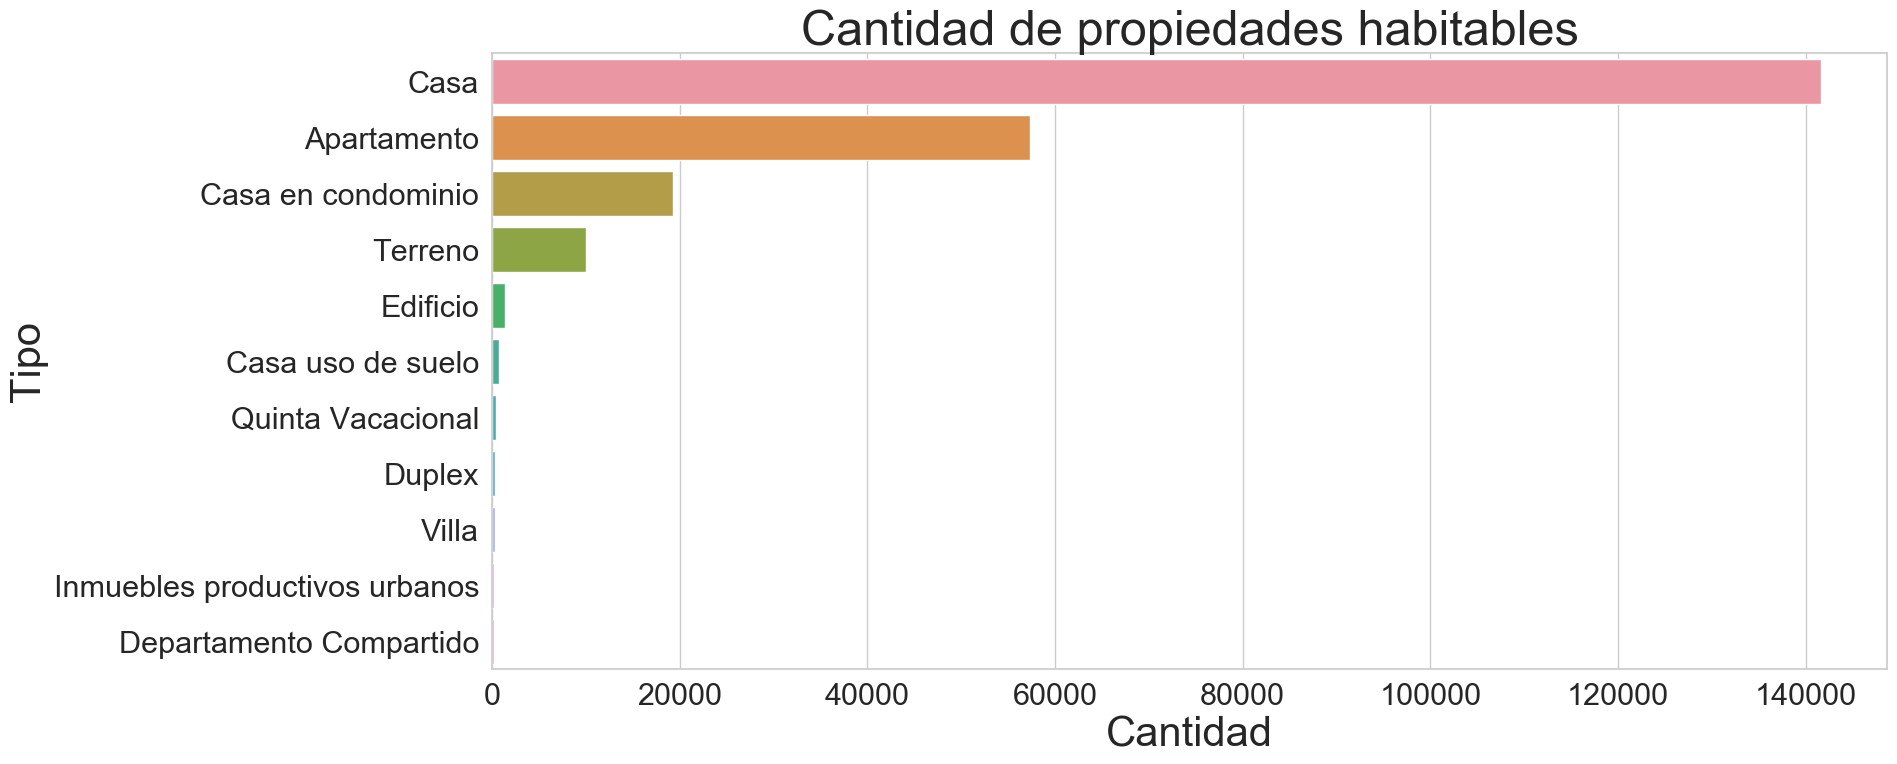

In [12]:
propiedades_habitables_g = sns.barplot(x = propiedades_habitables_conteo.values, y = propiedades_habitables_conteo.index, orient='h')

propiedades_habitables_g.set_title("Cantidad de propiedades habitables", fontsize=TAM_TITULO)
propiedades_habitables_g.set_xlabel("Cantidad", fontsize=TAM_ETIQUETA)
propiedades_habitables_g.set_ylabel("Tipo", fontsize=TAM_ETIQUETA)

### Cantidad de tipos de propiedad para propiedades comerciables:

In [13]:
propiedades_comerciales = ["Local Comercial", "Oficina comercial", "Bodega comercial", "Terreno comercial", "Local en centro comercial"]

propiedades_comerciales_df = df[df["tipodepropiedad"].isin(propiedades_comerciales)]

propiedades_comerciales_conteo = propiedades_comerciales_df["tipodepropiedad"].value_counts()

Text(0, 0.5, 'Tipo')

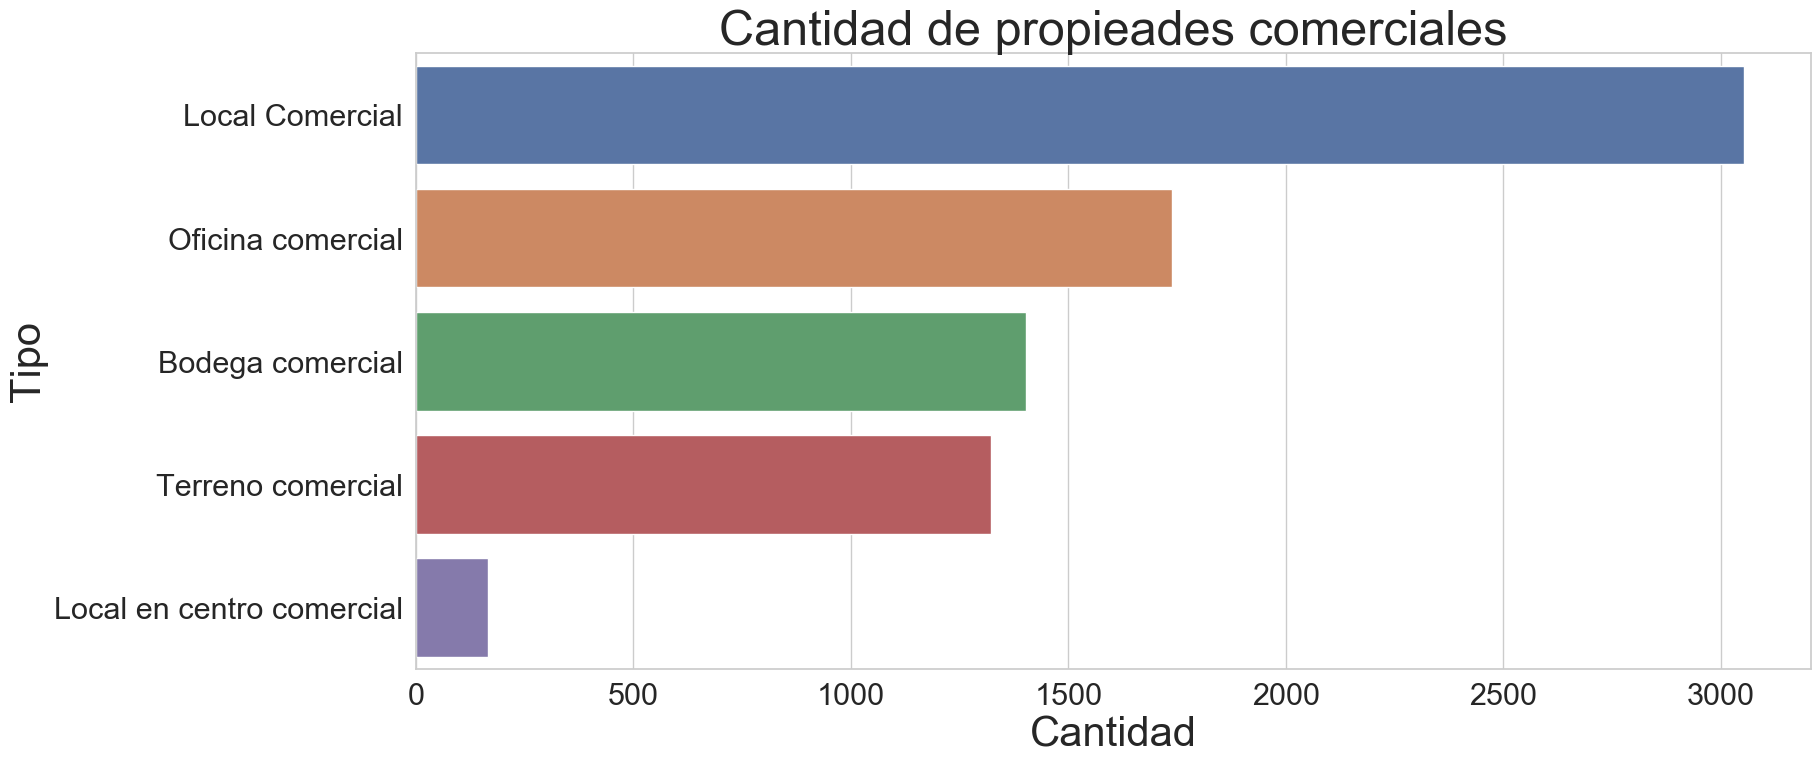

In [14]:
propiedades_comerciales_g = sns.barplot(x = propiedades_comerciales_conteo.values, y = propiedades_comerciales_conteo.index, orient='h')

propiedades_comerciales_g.set_title("Cantidad de propieades comerciales", fontsize=TAM_TITULO)
propiedades_comerciales_g.set_xlabel("Cantidad", fontsize=TAM_ETIQUETA)
propiedades_comerciales_g.set_ylabel("Tipo", fontsize=TAM_ETIQUETA)

## Cantidad de tipos de propiedades por provincia

### Cantidad de todos los tipos de propiedades por provincia

In [15]:
provincia_tipodepropiedad = df.groupby("provincia")["tipodepropiedad"].value_counts().unstack().fillna(0)
provincia_tipodepropiedad

tipodepropiedad,Apartamento,Bodega comercial,Casa,Casa en condominio,Casa uso de suelo,Departamento Compartido,Duplex,Edificio,Garage,Hospedaje,...,Lote,Nave industrial,Oficina comercial,Otros,Quinta Vacacional,Rancho,Terreno,Terreno comercial,Terreno industrial,Villa
provincia,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,47.00,7.00,"1,340.00",197.00,6.00,0.00,0.00,6.00,0.00,0.00,...,0.00,1.00,3.00,0.00,7.00,0.00,86.00,10.00,0.00,5.00
Baja California Norte,196.00,4.00,"2,769.00",166.00,2.00,5.00,23.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,2.00,3.00,24.00,4.00,0.00,2.00
Baja California Sur,82.00,2.00,"1,473.00",34.00,5.00,0.00,2.00,4.00,0.00,0.00,...,0.00,0.00,1.00,0.00,1.00,1.00,52.00,20.00,0.00,1.00
Campeche,7.00,1.00,210.00,11.00,1.00,0.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,20.00,1.00,0.00,0.00
Chiapas,52.00,8.00,903.00,14.00,4.00,0.00,1.00,13.00,0.00,0.00,...,0.00,0.00,5.00,0.00,3.00,3.00,100.00,0.00,0.00,1.00
Chihuahua,41.00,35.00,"3,891.00",10.00,5.00,0.00,0.00,27.00,0.00,0.00,...,0.00,0.00,34.00,9.00,11.00,7.00,230.00,47.00,1.00,8.00
Coahuila,20.00,24.00,"3,329.00",21.00,5.00,0.00,0.00,12.00,0.00,0.00,...,0.00,2.00,30.00,0.00,12.00,9.00,166.00,10.00,1.00,7.00
Colima,83.00,4.00,777.00,48.00,0.00,0.00,1.00,3.00,0.00,0.00,...,0.00,0.00,4.00,0.00,0.00,5.00,54.00,8.00,0.00,3.00
Distrito Federal,"33,839.00",322.00,"15,812.00","4,596.00",277.00,58.00,43.00,616.00,1.00,0.00,...,1.00,24.00,736.00,29.00,6.00,5.00,"1,677.00",194.00,4.00,3.00


### Cantidad de tipos de propiedad para las propiedades habitables por provincia

In [18]:
### Elimino las provincias con menos de 2000 propiedades
provincias_validas = df["provincia"].value_counts() > 2000
provincias_validas = provincias_validas[provincias_validas == True]
provincias_validas = list(provincias_validas.index)
df_reducido = df[df["provincia"].isin(provincias_validas)]

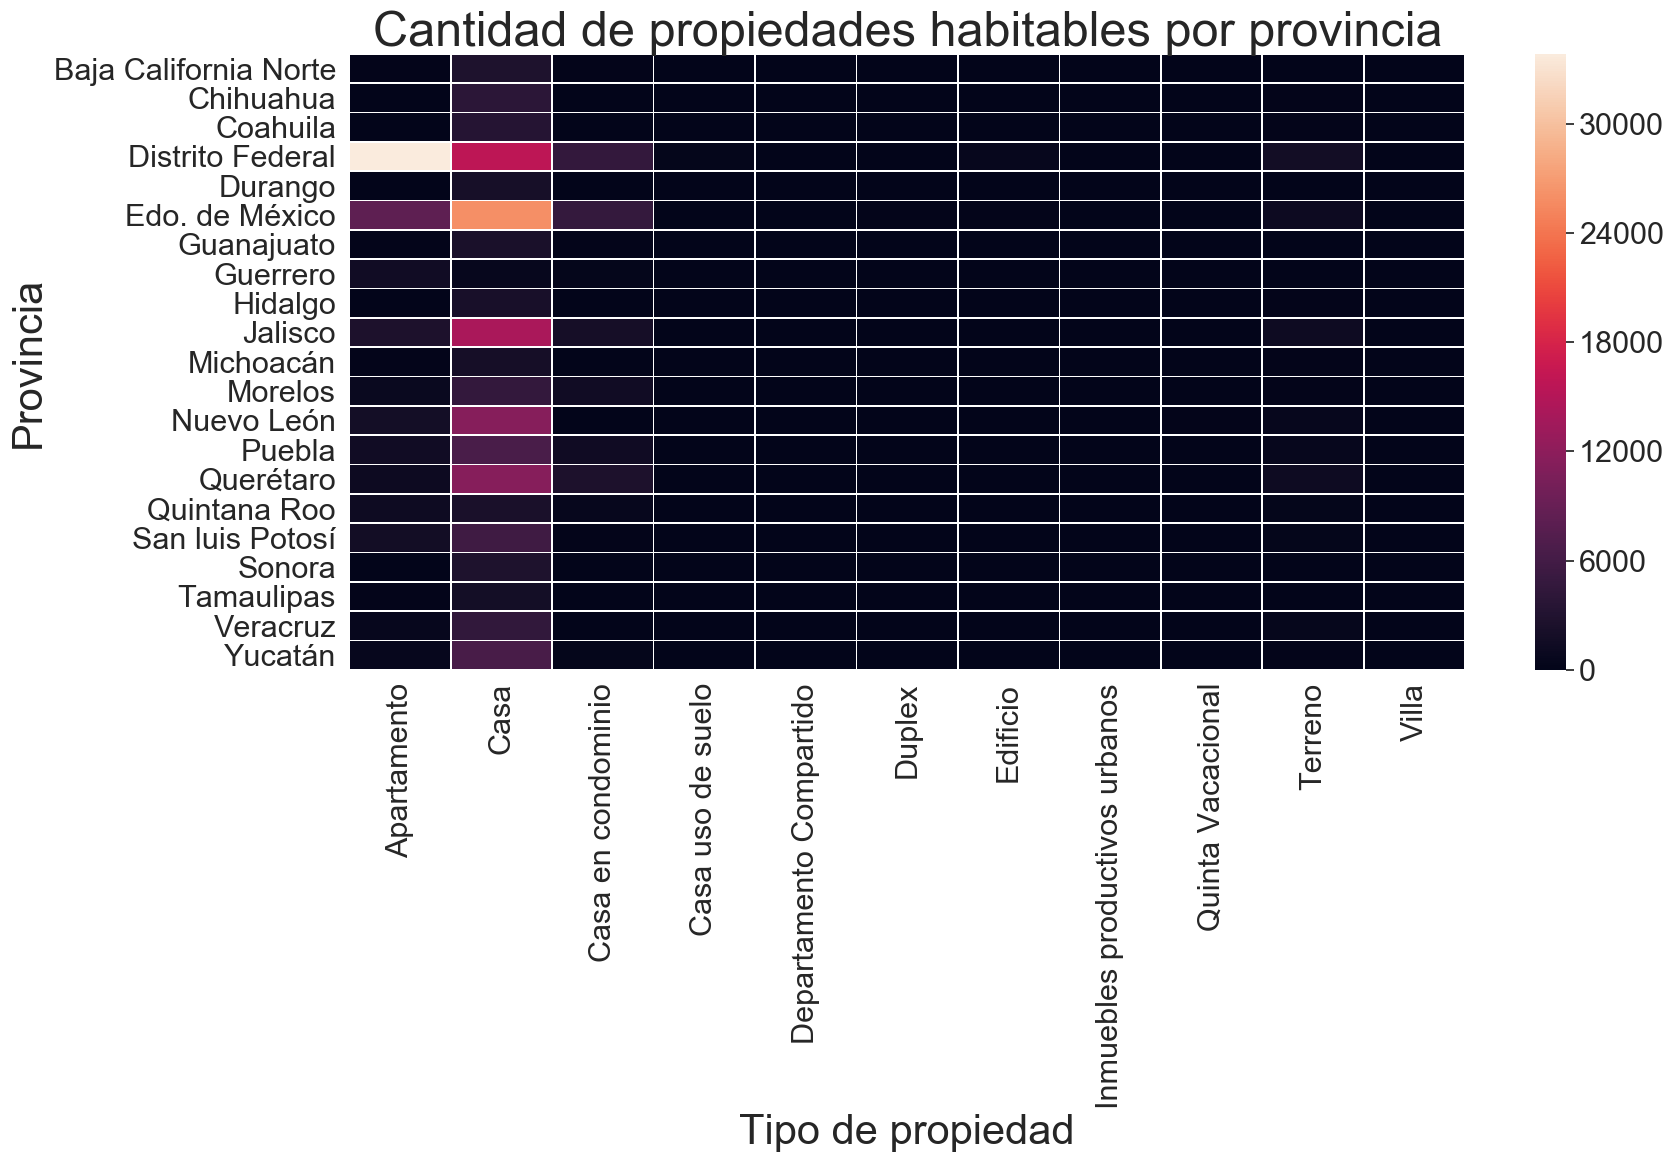

In [24]:
# Dejo solo los tipos de propiedad que son habitables
df_provincias_habitables = df_reducido[df_reducido["tipodepropiedad"].isin(propiedades_habitables)]
crear_heatmap(df_provincias_habitables,"Cantidad de propiedades habitables por provincia","Tipo de propiedad","Provincia")

### Cantidad de tipos de propiedad para las propiedades comerciales por provincia

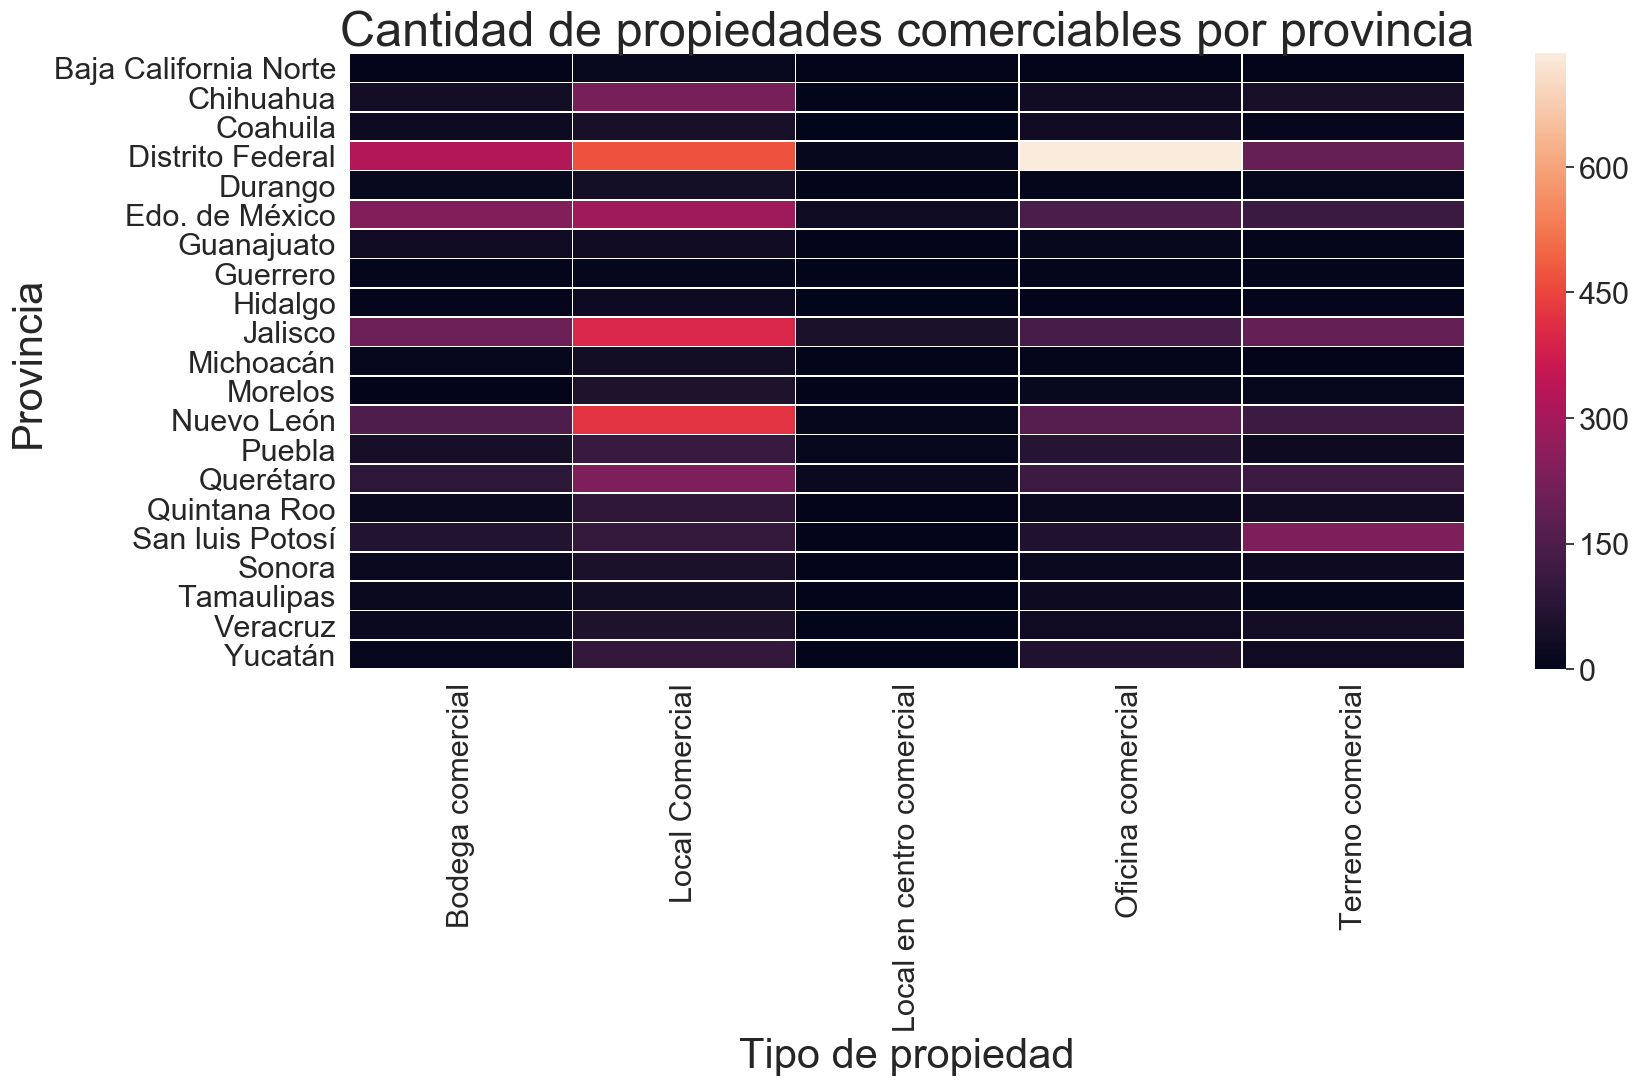

In [26]:
# Dejo solo los tipos de propiedad que son habitables
df_provincias_comerciables = df_reducido[df_reducido["tipodepropiedad"].isin(propiedades_comerciales)]
crear_heatmap(df_provincias_comerciables,"Cantidad de propiedades comerciables por provincia","Tipo de propiedad","Provincia")